In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
AnnualFemale = pd.read_csv('./annual-change-in-average-female-height.csv')
AnnualMale = pd.read_csv('./annual-change-in-average-male-height.csv')

In [4]:
AnnualFemale['Year-on-year change in female height (%)'].mean()

0.05370655865384616

In [5]:
AnnualMale['Year-on-year change in male height (%)'].mean()

0.052551402884615385

平均男性身高的年度变化是5.26%， 女性的是5.37%。

In [6]:
avgHeight = pd.read_csv('./average-height-by-year-of-birth.csv')
#avgHeight.head(5)

In [7]:
avgHeight['Mean female height (cm)'].mean()

157.0250822342441

In [8]:
avgHeight['Mean male height (cm)'].mean()

168.32671833534368

按出生年份划分的男性平均身高是168.33cm，女性是157.03cm。

In [9]:
century1 = avgHeight[avgHeight['Year'] < 1946]
century2 = avgHeight[avgHeight['Year'] > 1946]

In [12]:
century2['Mean female height (cm)'].mean() - century1['Mean female height (cm)'].mean()

4.821500224807693

In [11]:
century2['Mean male height (cm)'].mean() - century1['Mean male height (cm)'].mean()

5.465253064490383

两个世纪以来男性身高的增加为5.465cm，女性身高增加为4.82cm。

综上，两性身高在全球程增长状态。

In [15]:
annual = AnnualFemale.merge(AnnualMale)
#annual.info()

In [14]:
minChange = annual.groupby('Entity').agg({'Year-on-year change in female height (%)':'min'}).reset_index()
maxChange = annual.groupby('Entity').agg({'Year-on-year change in female height (%)':'max'}).reset_index()
maxChange

,Entity,Year-on-year change in female height (%)
0,Afghanistan,0.08977
1,Albania,0.14483
2,Algeria,0.09030
3,American Samoa,0.07067
4,Andorra,0.10429
...,...,...
203,Vietnam,0.13050
204,World,0.09634
205,Yemen,0.11227
206,Zambia,0.09321


In [22]:
maxChange['diff'] = maxChange['Year-on-year change in female height (%)'] - minChange['Year-on-year change in female height (%)']
maxChange['diff'].max() 
maxChange[maxChange['diff'] == 0.22614]

,Entity,Year-on-year change in female height (%),diff
96,Kiribati,0.16135,0.22614


Kiribati的身高绝对增长幅度最大，为2.26%。 

In [19]:
female = annual.groupby('Entity').agg({'Year-on-year change in female height (%)':'mean'}).reset_index()
sum(female['Year-on-year change in female height (%)'] < 0)

0

In [21]:
male = annual.groupby('Entity').agg({'Year-on-year change in male height (%)':'mean'}).reset_index()
sum(male['Year-on-year change in male height (%)'] < 0)

0

世界各地男性或女性的身高增加更多，因为各个国家的历年平均增长都是正数。

In [24]:
maxChange

,Entity,Year-on-year change in female height (%),diff
0,Afghanistan,0.08977,0.12811
1,Albania,0.14483,0.15865
2,Algeria,0.09030,0.11456
3,American Samoa,0.07067,0.07933
4,Andorra,0.10429,0.08631
...,...,...,...
203,Vietnam,0.13050,0.14566
204,World,0.09634,0.10865
205,Yemen,0.11227,0.15653
206,Zambia,0.09321,0.17760


In [25]:
maleHeight = avgHeight.groupby('Entity').agg({'Mean male height (cm)': 'mean'}).reset_index()
femaleHeight = avgHeight.groupby('Entity').agg({'Mean female height (cm)': 'mean'}).reset_index()

<Axes: >

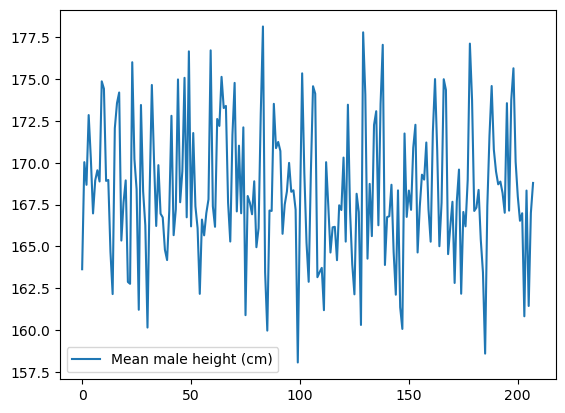

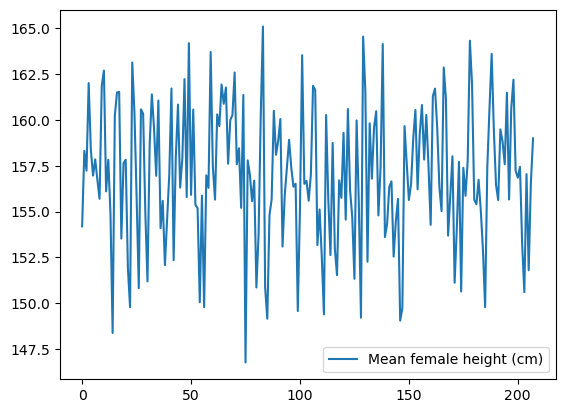

In [27]:
maleHeight.plot()
femaleHeight.plot()

In [29]:
maleHeight['Mean male height (cm)'].max()
maleHeight[maleHeight['Mean male height (cm)'] == 178.14609664059407]

,Entity,Mean male height (cm)
83,Iceland,178.146097


In [30]:
maleHeight['Mean male height (cm)'].min()
maleHeight[maleHeight['Mean male height (cm)'] == 158.060806609901]

,Entity,Mean male height (cm)
99,Laos,158.060807


In [31]:
femaleHeight['Mean female height (cm)'].max()
femaleHeight[femaleHeight['Mean female height (cm)'] == 165.1020810930693]

,Entity,Mean female height (cm)
83,Iceland,165.102081


In [32]:
femaleHeight['Mean female height (cm)'].min()
femaleHeight[femaleHeight['Mean female height (cm)'] == 146.75833341782177]

,Entity,Mean female height (cm)
75,Guatemala,146.758333


冰岛男性平均身高为全球最高，178.15cm，老挝男性身高为全球最矮，158.06cm。
冰岛女性平均身高为全球最高，165.10cm，危地马拉女性平均身高为全球最低，146.76cm。

In [42]:
height = maleHeight.merge(femaleHeight)
#height.info()

In [41]:
height

,Entity,Mean male height (cm),Mean female height (cm)
0,Afghanistan,163.634297,154.191951
1,Albania,170.035486,158.312871
2,Algeria,168.681924,157.231201
3,American Samoa,172.850139,162.011056
4,Andorra,170.236228,158.370925
...,...,...,...
203,Vietnam,160.821719,150.599055
204,World,168.337720,157.044033
205,Yemen,161.438340,151.794179
206,Zambia,167.000935,156.561965


以上为世界各地男性/女性有多高的各地汇总

In [39]:
height['diff'] = height['Mean male height (cm)'] - height['Mean female height (cm)']
height

,Entity,Mean male height (cm),Mean female height (cm),diff
0,Afghanistan,163.634297,154.191951,9.442346
1,Albania,170.035486,158.312871,11.722616
2,Algeria,168.681924,157.231201,11.450722
3,American Samoa,172.850139,162.011056,10.839083
4,Andorra,170.236228,158.370925,11.865303
...,...,...,...,...
203,Vietnam,160.821719,150.599055,10.222664
204,World,168.337720,157.044033,11.293686
205,Yemen,161.438340,151.794179,9.644161
206,Zambia,167.000935,156.561965,10.438970


以上为男人比女人高多少的各地汇总

In [44]:
child = pd.read_csv('./NCD_RisC_Lancet_2020_height_child_adolescent_global.csv')
child.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Sex                                         1050 non-null   object 
 1   Year                                        1050 non-null   int64  
 2   Age group                                   1050 non-null   int64  
 3   Mean height                                 1050 non-null   float64
 4   Mean height lower 95% uncertainty interval  1050 non-null   float64
 5   Mean height upper 95% uncertainty interval  1050 non-null   float64
 6   Mean height standard error                  1050 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 57.6+ KB


In [48]:
boys = child[child['Sex'] == 'Boys']
#boys.info()

In [49]:
girls = child[child['Sex'] == 'Girls']
#girls.info()

In [50]:
boysHeight = boys.groupby('Year').agg({'Mean height': 'mean'}).reset_index()

<Axes: >

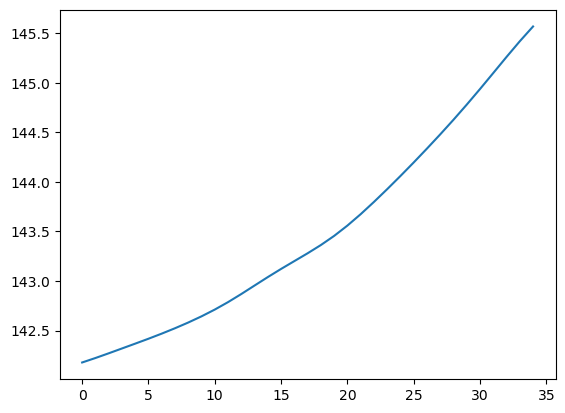

In [51]:
boysHeight['Mean height'].plot()

In [111]:
girlsHeight = girls.groupby('Year').agg({'Mean height': 'mean'}).reset_index()

<Axes: >

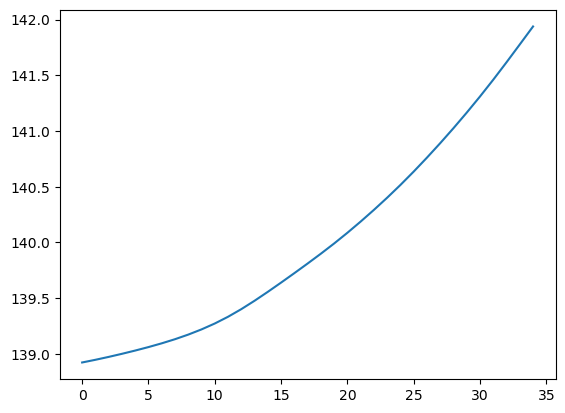

In [107]:
girlsHeight['Mean height'].plot()

2019年为止，男孩在最终19岁时的身高，会比女生在19岁的身高要高。
男孩的年身高变化较女孩的相比更加稳定：女孩在1985-1995年平均变化较慢，男孩则较快。
在2005年以后，每年男孩/女孩青少年的身高较之前发生了明显的提升。

In [53]:
df1 = annual.groupby('Year').agg({'Year-on-year change in male height (%)': 'mean'}).reset_index()
df2 = annual.groupby('Year').agg({'Year-on-year change in female height (%)': 'mean'}).reset_index()
df2

,Year,Year-on-year change in female height (%)
0,1897,0.095455
1,1898,0.095532
2,1899,0.095460
3,1900,0.095272
4,1901,0.094919
...,...,...
95,1992,-0.012105
96,1993,-0.012135
97,1994,-0.012366
98,1995,-0.012391


<Axes: >

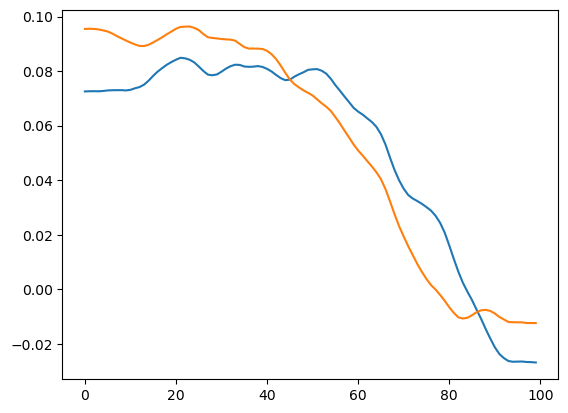

In [120]:
df1['Year-on-year change in male height (%)'].plot()
df2['Year-on-year change in female height (%)'].plot()

上图中，蓝线为男性，橙线为女性。横轴越靠近100，代表离1996越近。
两性的身高都是负增长的，男性降速更大。

剩下5个研究问题，基于已有的数据，只能验证该现象，无法分析其原因。